__Exploring the data and helping optimize marketing expenses.__

In [1]:
# importing libraries: pandas, numpy, matplotlib, plotly.express, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# loading dataframes
visits_log_us = pd.read_csv('/datasets/visits_log_us.csv')
orders_log_us = pd.read_csv('/datasets/orders_log_us.csv')
costs_us = pd.read_csv('/datasets/costs_us.csv')

In [3]:
# checking for missing values in visits_log_us, way 1
visits_log_us.info()
display(visits_log_us.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
# checking for missing values in orders_log_us, way 1
orders_log_us.info()
display(orders_log_us.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [5]:
# checking for missing values in costs_us, way 1
costs_us.info()
display(costs_us.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [6]:
# checking for missing values, way 2
print(visits_log_us.isna().sum())
print()
print(orders_log_us.isna().sum())
print()
print(costs_us.isna().sum())

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

source_id    0
dt           0
costs        0
dtype: int64


__No missing values in the dataframes__

In [7]:
# checking for duplicated rows
print(visits_log_us.duplicated().sum())
print(orders_log_us.duplicated().sum())
print(costs_us.duplicated().sum())

0
0
0


__No duplicates in the dataframes__

__Preparing data in visits_log_us dataframe__

In [8]:
# checking values in visits_log_us['Device']
visits_log_us['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [9]:
# checking values in 'Source Id' column
visits_log_us['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

In [10]:
# changing the types of 'Device' and 'Source Id' columns to categories
visits_log_us['Device'] = visits_log_us['Device'].astype('category')
visits_log_us['Source Id'] = visits_log_us['Source Id'].astype('category')

In [11]:
# changing the types of 'End Ts' and 'Start Ts' columns to datetime
visits_log_us['End Ts'] =  pd.to_datetime(visits_log_us['End Ts'], format = "%Y-%m-%d %H:%M:%S")
visits_log_us['Start Ts'] =  pd.to_datetime(visits_log_us['Start Ts'], format = "%Y-%m-%d %H:%M:%S")

In [12]:
# renaming columns
visits_log_us.columns = ['device', 'session_end_dt', 'source_id', 'session_start_dt', 'user_id']

__Data in visits_log_us dataframe prepared__

__Preparing data in orders_log_us dataframe__

In [13]:
# changing the type of 'Buy Ts' column to datetime
orders_log_us['Buy Ts'] =  pd.to_datetime(orders_log_us['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

In [14]:
# renaming columns
orders_log_us.columns = ['order_dt', 'revenue_from_order', 'user_id']

In [15]:
# removing row N 50414 because it's the only row with after 2018-05-31, it's useless
orders_log_us = orders_log_us.drop(50414)

__Data in orders_log_us dataframe prepared__

__Preparing data in costs_us dataframe__

In [16]:
# changing the type of 'Buy Ts' column to datetime
costs_us['dt'] =  pd.to_datetime(costs_us['dt'], format="%Y-%m-%d")

In [17]:
# checking values in 'source_id' column
costs_us['source_id'].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

In [18]:
# changing the type of 'Device' column to categories
costs_us['source_id'] = costs_us['source_id'].astype('category')

In [19]:
# renaming columns
costs_us.columns = ['source_id', 'marketing_dt', 'marketing_costs']

__Data in costs_us dataframe prepared__

__Researching how many people use the product every day, week, and month__

In [20]:
# creating columns 'session_start_day', 'session_start_week' and 'session_start_month' 
# to retreive days, weeks and months of the session
visits_log_us['session_start_day']  = visits_log_us['session_start_dt'].values.astype('datetime64[D]')
visits_log_us['session_start_week']  = visits_log_us['session_start_dt'].values.astype('datetime64[W]')
visits_log_us['session_start_month'] = visits_log_us['session_start_dt'].values.astype('datetime64[M]')

In [21]:
# finding how many people use the product every day
daily_active_users = visits_log_us.groupby(visits_log_us['session_start_day'])['user_id'].nunique()

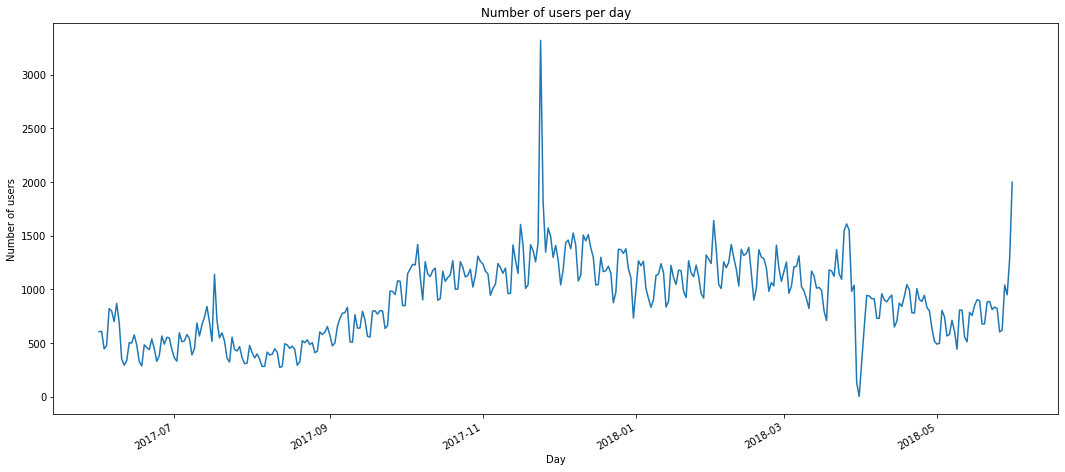

In [22]:
# creating plot how many people use the product every day
daily_active_users.plot(figsize = (18, 8))
plt.title('Number of users per day')
plt.xlabel('Day')
plt.ylabel('Number of users');

In [23]:
# finding how many people use the product every week
weekly_active_users = visits_log_us.groupby('session_start_week')['user_id'].nunique()

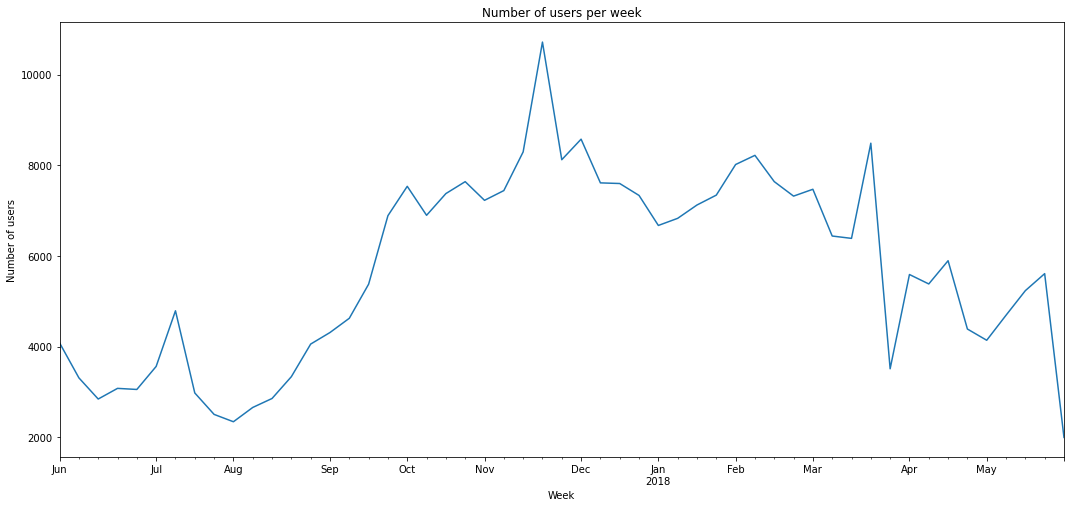

In [24]:
# creating plot how many people use the product every week
weekly_active_users.plot(figsize = (18, 8))
plt.title('Number of users per week')
plt.xlabel('Week')
plt.ylabel('Number of users');

In [25]:
# finding how many people use the product every month
monthly_active_users = visits_log_us.groupby('session_start_month')['user_id'].nunique()

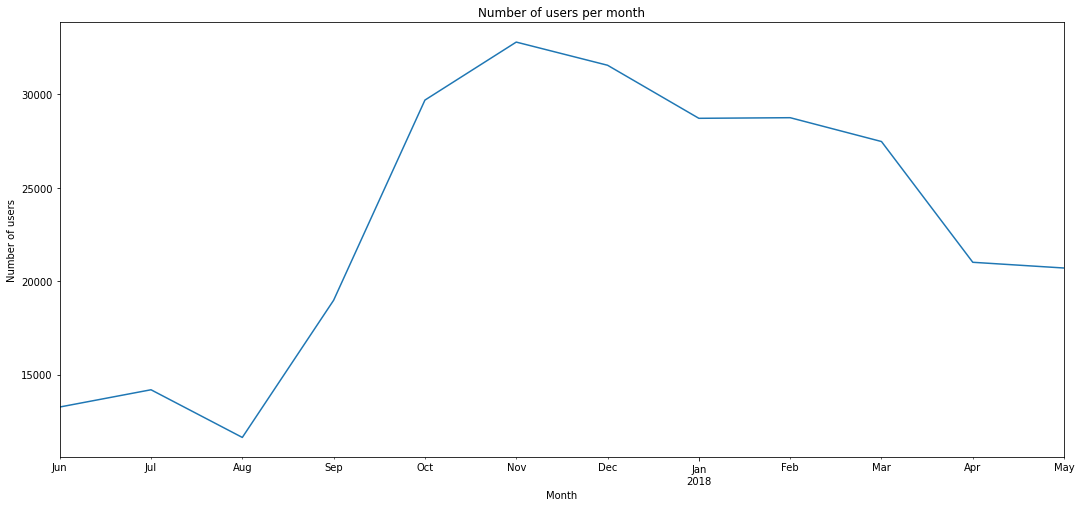

In [26]:
# creating plot how many people use the product every month
monthly_active_users.plot(figsize = (18, 8))
plt.title('Number of users per month')
plt.xlabel('Month')
plt.ylabel('Number of users');

__Researching how many sessions are there per day__

In [27]:
# finding how many sessions are there per day
daily_sessions = visits_log_us.groupby('session_start_day')['user_id'].count()

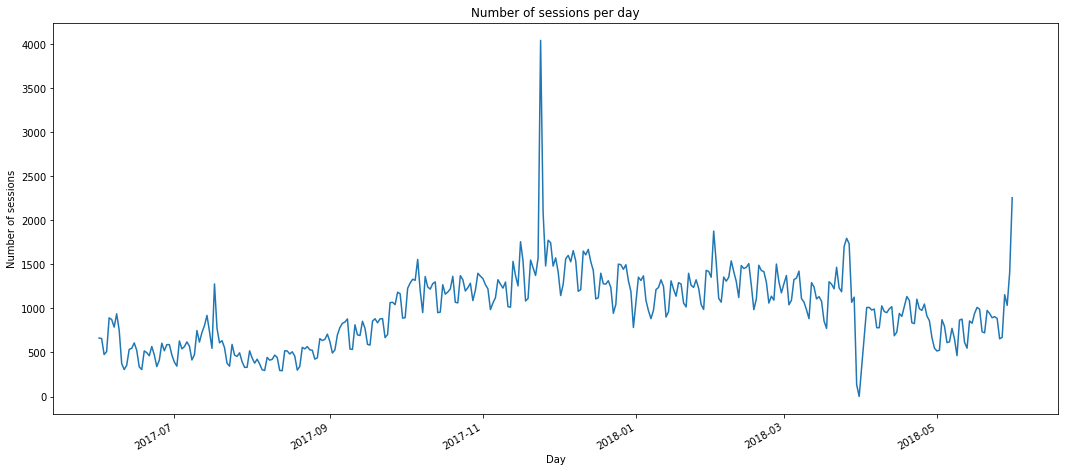

In [28]:
# creating plot how many sessions are there per day
daily_sessions.plot(figsize = (18, 8))
plt.title('Number of sessions per day')
plt.xlabel('Day')
plt.ylabel('Number of sessions');

__Finding the length of each session__

In [29]:
# adding the length of each session as 'session_length'
visits_log_us['session_length'] = visits_log_us['session_end_dt'] - visits_log_us['session_start_dt']

In [30]:
# counting average length of sessions
avg_session_length = visits_log_us['session_length'].mean()

In [31]:
# printing average length of sessions
print('Average length of sessions:', avg_session_length)

Average length of sessions: 0 days 00:10:43.025687256


__Finding the user retention rate__

In [32]:
# finding first activity day of every user
first_activity_day = visits_log_us.groupby(['user_id'])['session_start_day'].min().reset_index()

In [33]:
# renaming columns
first_activity_day.columns = ['user_id', 'first_activity_day']

In [34]:
# merging first_activity_day in visits_log_us 
visits_log_us = visits_log_us.merge(first_activity_day, on = 'user_id')

In [35]:
# creating first_activity_month in visits_log_us 
visits_log_us['first_activity_month'] = visits_log_us['first_activity_day'].values.astype('datetime64[M]')

In [36]:
visits_log_us

,device,session_end_dt,source_id,session_start_dt,user_id,session_start_day,session_start_week,session_start_month,session_length,first_activity_day,first_activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,0 days 00:18:00,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,0 days 00:28:00,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0 days 00:00:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,0 days 00:24:00,2018-03-09,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,0 days 00:28:00,2018-03-09,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23,2018-04-19,2018-04-01,0 days 00:08:00,2018-04-23,2018-04-01
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-08,2017-11-02,2017-11-01,0 days 00:00:00,2017-11-08,2017-11-01
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-31,2017-07-27,2017-07-01,0 days 00:18:00,2017-07-31,2017-07-01
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-20,2018-03-15,2018-03-01,0 days 00:14:00,2018-03-20,2018-03-01


In [37]:
# forming cohort lifetimes
visits_log_us['year_month'] = visits_log_us['session_start_dt'].astype('datetime64[M]')
visits_log_us['cohort_lifetime'] = round((visits_log_us['year_month'] 
                                          - visits_log_us['first_activity_month']) / np.timedelta64(1,'M')).astype('int')

In [38]:
# creating pivot table with cohort lifetimes
cohorts_pivot = visits_log_us.pivot_table(index = 'first_activity_month',
                  columns = 'cohort_lifetime',
                  values = 'user_id',
                  aggfunc = 'nunique')
cohorts_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# creating pivot table with cohort lifetimes in %
retention = cohorts_pivot.iloc[:, 0:].div(cohorts_pivot[0], axis = 0)
retention

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


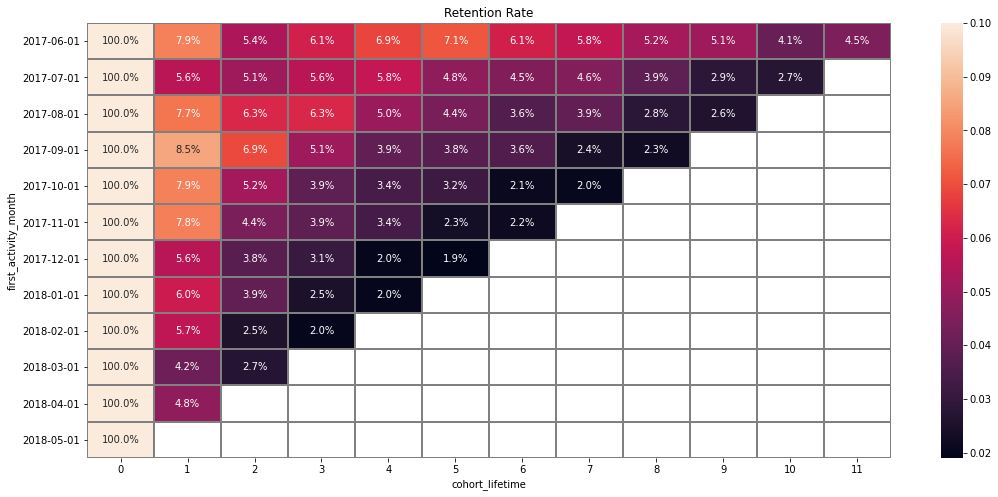

In [40]:
# creating pivot table and making a heatmap
retention.index = retention.index.astype(str)
plt.figure(figsize = (18, 8))
sns.heatmap(retention, annot = True, fmt = '.1%', linewidths = 1, linecolor = 'grey',  
            vmax = 0.1).set(title = 'Retention Rate');

__As we see retention rate is very low from the first month of cohorts lifetime__

__Exploring when do people start buying__

In [41]:
# finding dates of orders
orders_log_us['order_date'] = orders_log_us['order_dt'].values.astype('datetime64[D]')

In [42]:
# finding date of registration of every user
registration_day = visits_log_us.groupby(['user_id'])['session_start_day'].min().reset_index()

In [43]:
# renaming columns
registration_day.columns = ['user_id', 'registration_day']

In [44]:
# finding date of first purchase of every user
first_purchase_day = orders_log_us.groupby(['user_id'])['order_date'].min().reset_index()

In [45]:
# renaming columns
first_purchase_day.columns = ['user_id', 'first_purchase_day']

In [46]:
# merging registration_day in first_purchase_day 
first_purchase_day = first_purchase_day.merge(registration_day, on = 'user_id')

In [47]:
# counting conversion
first_purchase_day['conversion'] = ((first_purchase_day['first_purchase_day'] - first_purchase_day['registration_day']) 
                                    / np.timedelta64(1,'D')).astype('int')

In [48]:
first_purchase_day['conversion'].describe()

count    36522.000000
mean        16.896336
std         47.071771
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion, dtype: float64

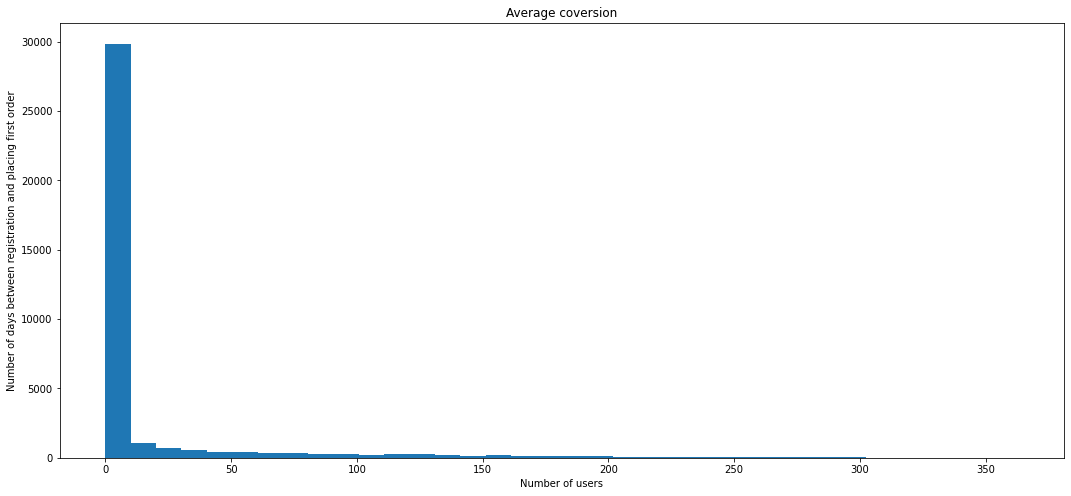

In [49]:
# creating plot when do people start buying
first_purchase_day['conversion'].plot(kind = 'hist', figsize = (18, 8), bins = 36)
plt.title('Average coversion')
plt.xlabel('Number of users')
plt.ylabel('Number of days between registration and placing first order');

__Exploring how many orders do customers make during a month__

In [50]:
# merging first_purchase_day in orders_log_us
orders_log_us = orders_log_us.merge(first_purchase_day, on = 'user_id')

In [51]:
# forming cohort of purchases lifetimes
orders_log_us['cohort_purchase_lifetime'] = ((pd.to_datetime(orders_log_us['order_date']) - 
                                    pd.to_datetime(orders_log_us['first_purchase_day'])) / 
                                    np.timedelta64(1,'M')).round().astype('int')

In [52]:
# creating first_purchase_month and order_month in orders_log_us
orders_log_us['first_purchase_month'] = orders_log_us['first_purchase_day'].values.astype('datetime64[M]')
orders_log_us['order_month'] = orders_log_us['order_date'].values.astype('datetime64[M]')

In [53]:
# creating pivot table with cohort purchases lifetimes
cohorts_purchases_pivot = orders_log_us.pivot_table(index = 'first_purchase_month',
                  columns = 'cohort_purchase_lifetime',
                  values = 'user_id',
                  aggfunc = 'count').cumsum(axis = 1)
cohorts_purchases_pivot

cohort_purchase_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
first_purchase_month,,,,,,,,,,,,,
2017-06-01,2356.0,2502.0,2656.0,2890.0,3168.0,3372.0,3647.0,3845.0,4056.0,4232.0,4340.0,4405.0,4438.0
2017-07-01,2190.0,2282.0,2396.0,2500.0,2571.0,2639.0,2715.0,2775.0,2826.0,2853.0,2897.0,2910.0,NaN
2017-08-01,1562.0,1660.0,1759.0,1846.0,1912.0,1973.0,2043.0,2102.0,2154.0,2188.0,NaN,NaN,NaN
2017-09-01,2962.0,3155.0,3322.0,3468.0,3547.0,3661.0,3754.0,3815.0,3869.0,3878.0,NaN,NaN,NaN
2017-10-01,4983.0,5256.0,5440.0,5567.0,5686.0,5785.0,5874.0,5969.0,6005.0,NaN,NaN,NaN,NaN
2017-11-01,4954.0,5210.0,5431.0,5610.0,5739.0,5802.0,5880.0,5900.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,5065.0,5304.0,5521.0,5699.0,5779.0,5878.0,5894.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3808.0,4018.0,4168.0,4242.0,4301.0,4308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4103.0,4324.0,4407.0,4464.0,4470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# creating pivot table with cohort purchases lifetimes in %
retention_purchases = cohorts_purchases_pivot.iloc[:, 0:].div(cohorts_purchases_pivot[0], axis = 0)
retention_purchases

cohort_purchase_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
first_purchase_month,,,,,,,,,,,,,
2017-06-01,1.0,1.061969,1.127334,1.226655,1.344652,1.431239,1.547963,1.632003,1.721562,1.796265,1.842105,1.869694,1.883701
2017-07-01,1.0,1.042009,1.094064,1.141553,1.173973,1.205023,1.239726,1.267123,1.290411,1.302740,1.322831,1.328767,NaN
2017-08-01,1.0,1.062740,1.126120,1.181818,1.224072,1.263124,1.307939,1.345711,1.379001,1.400768,NaN,NaN,NaN
2017-09-01,1.0,1.065159,1.121540,1.170831,1.197502,1.235989,1.267387,1.287981,1.306212,1.309251,NaN,NaN,NaN
2017-10-01,1.0,1.054786,1.091712,1.117198,1.141080,1.160947,1.178808,1.197873,1.205097,NaN,NaN,NaN,NaN
2017-11-01,1.0,1.051675,1.096286,1.132418,1.158458,1.171175,1.186920,1.190957,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,1.047187,1.090030,1.125173,1.140967,1.160513,1.163672,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,1.055147,1.094538,1.113971,1.129464,1.131303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,1.053863,1.074092,1.087984,1.089447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


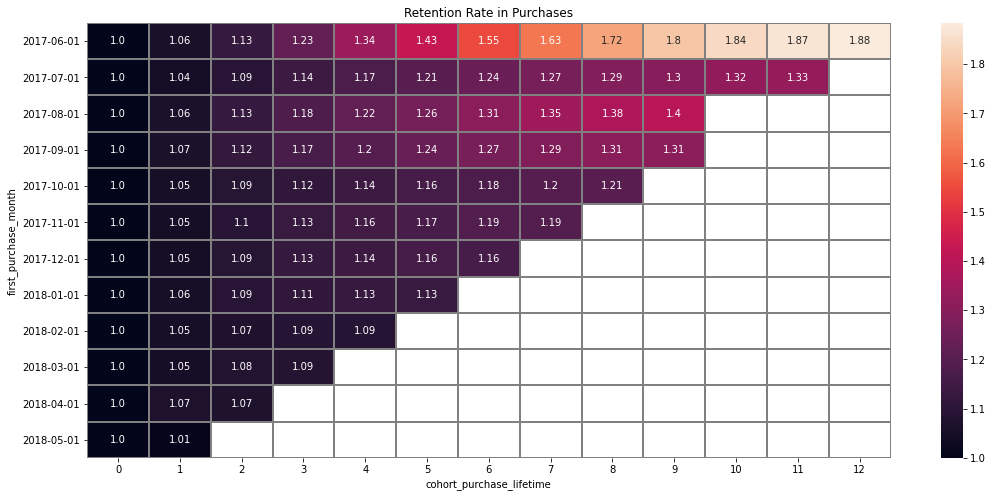

In [55]:
# making a heatmap
retention_purchases.index = retention_purchases.index.astype(str)
plt.figure(figsize = (18, 8))
sns.heatmap(retention_purchases, annot = True, fmt = '.3', linewidths = 1, 
            linecolor = 'grey').set(title = 'Retention Rate in Purchases');

In [56]:
cohorts_purchases_pivot = orders_log_us.pivot_table(index = 'first_purchase_month',
columns = 'cohort_purchase_lifetime',
values = 'user_id',
aggfunc = 'count').cumsum(axis = 1)
cohorts_purchases_pivot

cohort_purchase_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
first_purchase_month,,,,,,,,,,,,,
2017-06-01,2356.0,2502.0,2656.0,2890.0,3168.0,3372.0,3647.0,3845.0,4056.0,4232.0,4340.0,4405.0,4438.0
2017-07-01,2190.0,2282.0,2396.0,2500.0,2571.0,2639.0,2715.0,2775.0,2826.0,2853.0,2897.0,2910.0,NaN
2017-08-01,1562.0,1660.0,1759.0,1846.0,1912.0,1973.0,2043.0,2102.0,2154.0,2188.0,NaN,NaN,NaN
2017-09-01,2962.0,3155.0,3322.0,3468.0,3547.0,3661.0,3754.0,3815.0,3869.0,3878.0,NaN,NaN,NaN
2017-10-01,4983.0,5256.0,5440.0,5567.0,5686.0,5785.0,5874.0,5969.0,6005.0,NaN,NaN,NaN,NaN
2017-11-01,4954.0,5210.0,5431.0,5610.0,5739.0,5802.0,5880.0,5900.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,5065.0,5304.0,5521.0,5699.0,5779.0,5878.0,5894.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3808.0,4018.0,4168.0,4242.0,4301.0,4308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4103.0,4324.0,4407.0,4464.0,4470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Exploring what is the average purchase size__

In [57]:
# creating orders_by_month dataframe
orders_by_month = orders_log_us.groupby(['first_purchase_month', 'order_month']).agg({'revenue_from_order': 'mean'}).reset_index()

In [58]:
# creating orders_by_users dataframe
orders_by_users = orders_log_us.groupby(['first_purchase_month', 'order_month']).agg({'user_id': 'nunique'}).reset_index()

In [59]:
# merging orders_by_users in orders_by_month
orders_by_month_and_users = orders_by_month.merge(orders_by_users, on = ['first_purchase_month', 'order_month'])

In [60]:
# creating avg_number_of_orders and lifetime columns
orders_by_month_and_users['lifetime'] = ((orders_by_month_and_users['order_month'] - orders_by_month_and_users['first_purchase_month']) / np.timedelta64(1,'M')).round().astype('int')

In [61]:
orders_by_month_and_users

,first_purchase_month,order_month,revenue_from_order,user_id,lifetime
0,2017-06-01,2017-06-01,4.060106,2023,0
1,2017-06-01,2017-07-01,5.547006,61,1
2,2017-06-01,2017-08-01,5.088161,50,2
3,2017-06-01,2017-09-01,8.545575,54,3
4,2017-06-01,2017-10-01,7.084178,88,4
...,...,...,...,...,...
73,2018-03-01,2018-04-01,5.972191,90,1
74,2018-03-01,2018-05-01,6.334489,58,2
75,2018-04-01,2018-04-01,4.248774,2276,0
76,2018-04-01,2018-05-01,6.204718,69,1


In [62]:
# creating pivot table with average purchase size cohort
orders_by_month_and_users_pivot = orders_by_month_and_users.pivot_table(index = 'first_purchase_month',
                 columns = 'lifetime',
                 values = 'revenue_from_order',
                 aggfunc = 'mean')
orders_by_month_and_users_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,4.060106,5.547006,5.088161,8.545575,7.084178,6.825321,6.966449,6.761839,5.279009,8.009869,12.038125,6.042093
2017-07-01,5.287123,6.446100,9.992083,6.637596,4.721806,3.659512,3.789508,5.454400,5.345690,11.790000,5.648302,NaN
2017-08-01,4.715479,5.987315,6.281200,6.617901,7.962941,6.265323,5.890000,7.113590,8.702826,5.598478,NaN,NaN
2017-09-01,4.967109,13.171187,8.351056,62.570244,15.430448,15.321835,16.767130,11.206607,7.785574,NaN,NaN,NaN
2017-10-01,4.374738,7.405127,5.127469,5.590246,5.098992,5.071553,4.280233,4.009120,NaN,NaN,NaN,NaN
2017-11-01,4.370717,4.103955,4.474670,6.284976,4.441471,3.726780,4.598235,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.110746,4.226741,20.072772,26.084358,15.948488,14.111048,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3.687417,4.438482,6.454969,7.524844,2.711282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,3.706266,4.576486,3.453735,3.867143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


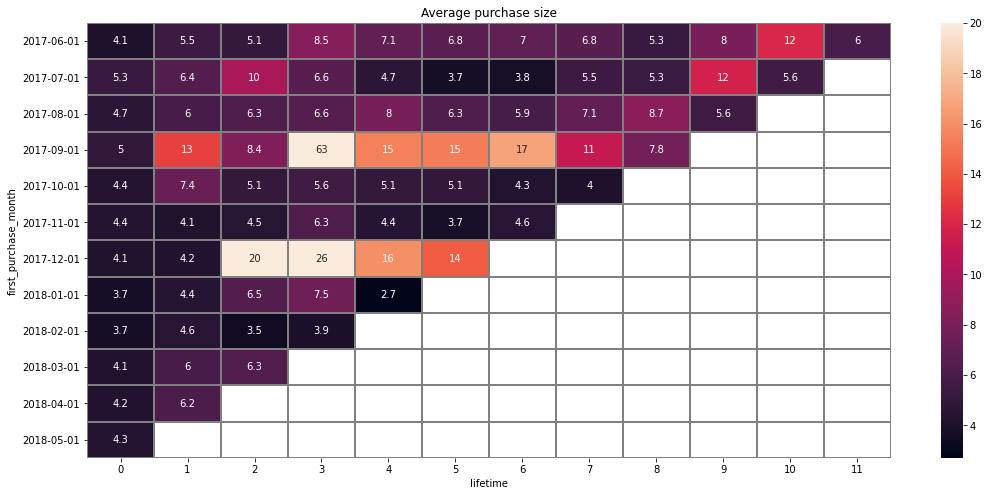

In [95]:
# making a heatmap
orders_by_month_and_users_pivot.index = orders_by_month_and_users_pivot.index.astype(str)
plt.figure(figsize = (18, 8))
sns.heatmap(orders_by_month_and_users_pivot, annot = True, linewidths = 1,  
            vmax = 20, linecolor = 'grey').set(title = 'Average purchase size');

__Exploring how much money do customers bring (LTV)__

In [64]:
# creating cohort_size_ltv dataframe with size of cohorts
cohort_size_ltv = orders_log_us.groupby('first_purchase_month').agg({'user_id': 'nunique'}).reset_index()

In [65]:
# creating ltv_cohort dataframe 
ltv_cohort = orders_log_us.groupby(['first_purchase_month','order_month'])['revenue_from_order'].sum().reset_index()

In [66]:
# merging first_activity_day in visits_log_us 
ltv_cohort = ltv_cohort.merge(cohort_size_ltv, on = 'first_purchase_month')

In [67]:
# renaming columns
ltv_cohort.columns = ['first_purchase_month', 'order_month', 'revenue', 'number_of_users']

In [68]:
# counting cohort lifetimes
ltv_cohort['cohort_lifetime'] = ((pd.to_datetime(ltv_cohort['order_month']) - 
                                    pd.to_datetime(ltv_cohort['first_purchase_month'])) / 
                                    np.timedelta64(1,'M')).round().astype('int')

In [69]:
# counting LTV
ltv_cohort['ltv'] = (ltv_cohort['revenue'] / ltv_cohort['number_of_users'])

In [70]:
ltv_cohort

,first_purchase_month,order_month,revenue,number_of_users,cohort_lifetime,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531
...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,1063.05,3533,1,0.300892
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599


In [71]:
# creating pivot table 
ltv_pivot = ltv_cohort.pivot_table(index = 'first_purchase_month',
                  columns = 'cohort_lifetime',
                  values = 'ltv',
                  aggfunc = 'sum').cumsum(axis = 1)
ltv_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


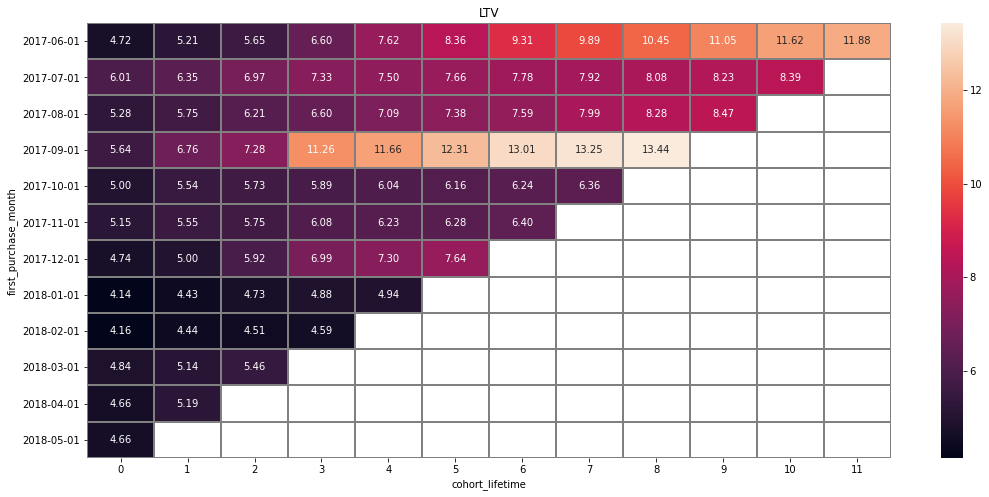

In [72]:
# creating pivot table and making a heatmap
ltv_pivot.index = ltv_pivot.index.astype(str)
plt.figure(figsize = (18, 8))
sns.heatmap(ltv_pivot, annot = True, linewidths = 1, linecolor = 'grey', 
            fmt = '.2f').set(title = 'LTV');

__Exploring how much money was spent on marketing overall__

In [73]:
# finding and printing overall marketing costs
print('Overall marketing costs are:', costs_us['marketing_costs'].sum())

Overall marketing costs are: 329131.62


__Overall marketing costs are 329131.62__

__Exploring how much money was spent on marketing per source__

In [74]:
# finding and printing marketing costs per source 
marketing_costs_per_source = costs_us.groupby('source_id')['marketing_costs'].sum().reset_index()
print(marketing_costs_per_source)

  source_id  marketing_costs
0         1         20833.27
1         2         42806.04
2         3        141321.63
3         4         61073.60
4         5         51757.10
5         9          5517.49
6        10          5822.49


__Marketing costs per source are:__ <br> 
__source_id 1: 20833.27__ <br> 
__source_id 2: 42806.04__ <br> 
__source_id 3: 141321.63__ <br> 
__source_id 4: 61073.60__ <br> 
__source_id 5: 51757.10__ <br> 
__source_id 9: 5517.49__ <br> 
__source_id 10: 5822.49__ <br> 

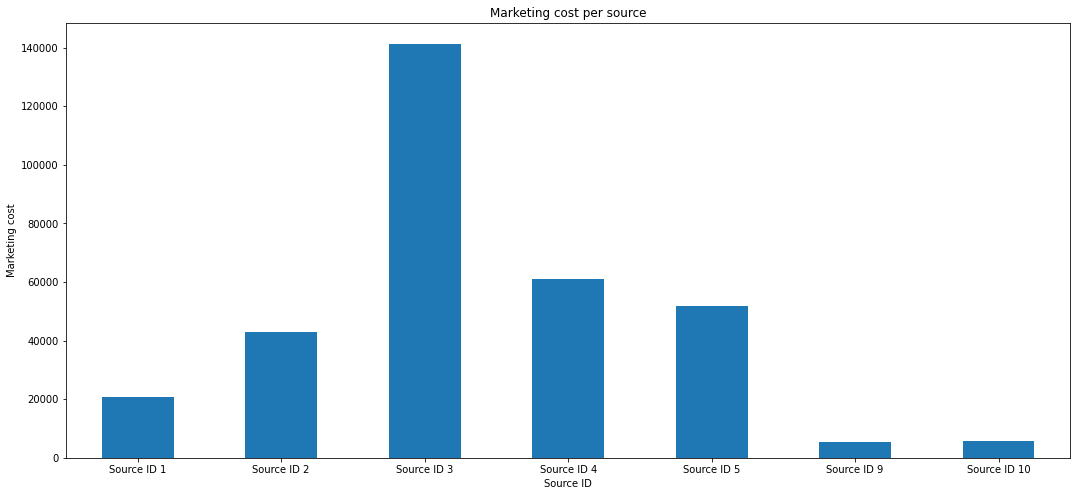

In [75]:
# creating plot marketing costs per source
marketing_costs_per_source['marketing_costs'].plot(kind = 'bar', figsize = (18, 8))
plt.title('Marketing cost per source')
plt.xlabel('Source ID')
plt.ylabel('Marketing cost')
plt.xticks([0, 1, 2, 3, 4, 5, 6], 
           ['Source ID 1', 'Source ID 2', 'Source ID 3', 'Source ID 4', 'Source ID 5', 'Source ID 9', 'Source ID 10'])
plt.xticks(rotation = 0);

__Exploring how much money was spent on marketing over time__

In [76]:
# creating column 'marketing_month' to retreive months of the marketing costs
costs_us['marketing_month'] = costs_us['marketing_dt'].values.astype('datetime64[M]')

In [77]:
# finding and printing marketing costs over time
marketing_costs_over_time = costs_us.groupby('marketing_month')['marketing_costs'].sum()
display(marketing_costs_over_time)

marketing_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: marketing_costs, dtype: float64

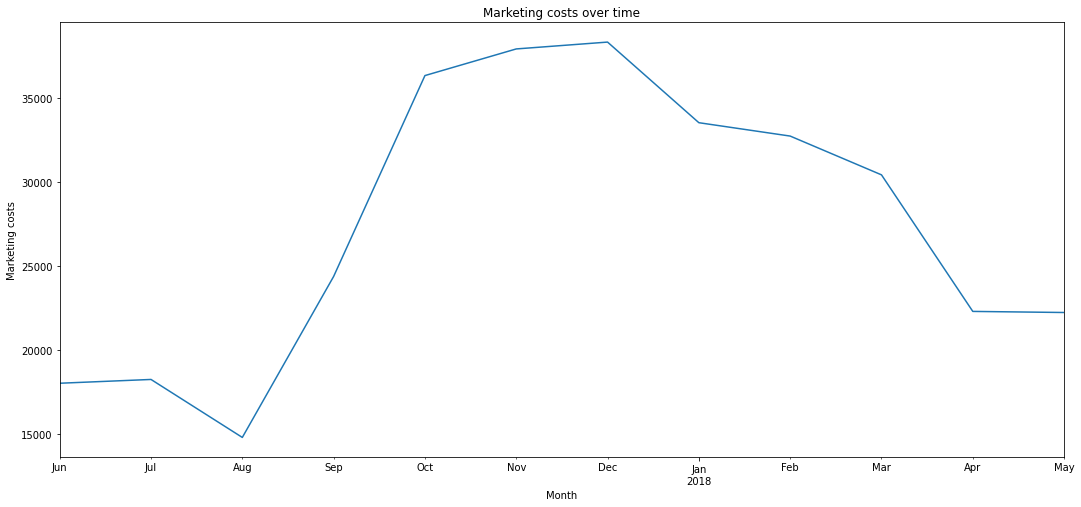

In [78]:
# creating plot marketing costs over time
marketing_costs_over_time.plot(figsize = (18, 8))
plt.title('Marketing costs over time')
plt.xlabel('Month')
plt.ylabel('Marketing costs');

__Exploring how much did customer acquisition from each of the sources cost__

In [79]:
# creating sources datafame, renaming columns
sources = visits_log_us.sort_values(by = ['user_id', 'session_start_dt']).groupby('user_id').agg({'source_id': 'first'}).reset_index()
sources.columns = ('user_id', 'first_source')

In [80]:
# merging orders_log_us datafame with sources
buyers = orders_log_us.groupby('user_id').agg({'order_dt': 'min'}).merge(sources, on = 'user_id').reset_index()

In [81]:
# creating buyers_per_month_source, costs_by_month_source datafames, renaming columns
buyers['month'] = buyers['order_dt'].astype('datetime64[M]')
buyers_per_month_source = buyers.groupby(['month', 'first_source'])['user_id'].nunique().reset_index().rename(columns = {'first_source': 'source_id'})
costs_by_month_source = costs_us.groupby(['marketing_month', 'source_id'])['marketing_costs'].sum().reset_index().rename(columns = {'marketing_month':'month', 'marketing_costs':'costs'})

In [82]:
# merging costs_by_month_source datafame with buyers_per_month_source
res = costs_by_month_source.merge(buyers_per_month_source, how = 'left', on = ['month', 'source_id'])

In [83]:
# finding CAC
res['CAC'] = res['costs'] / res['user_id']

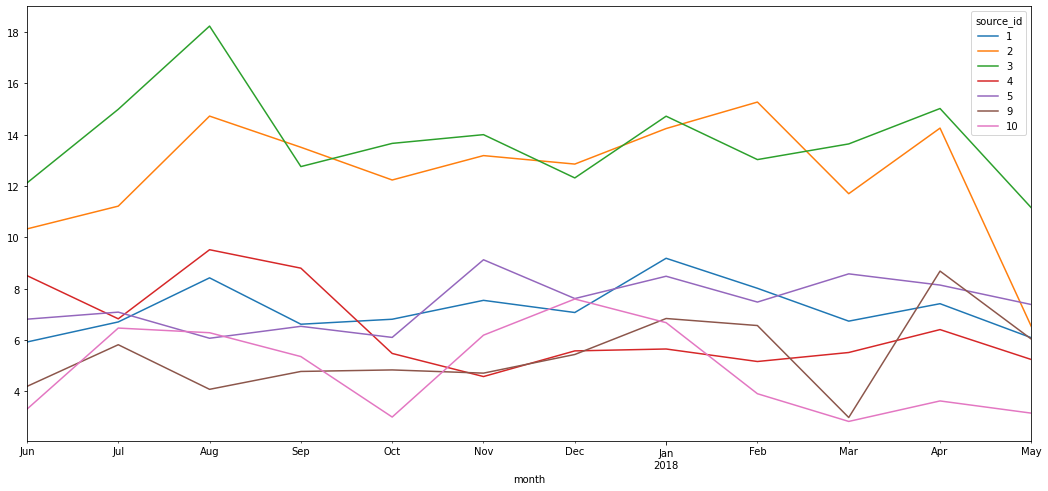

In [84]:
# creating plot
res.pivot_table(index = 'month', columns = 'source_id', values = 'CAC').plot(figsize = (18, 8));

__Exploring how worthwhile where the investments (ROI)__

In [85]:
# creting marketing_costs_per_month dataframe
marketing_costs_per_month = costs_us.groupby('marketing_month')['marketing_costs'].sum().reset_index()

In [86]:
# renaming columns
marketing_costs_per_month.columns = ['first_purchase_month', 'marketing_costs']
marketing_costs_per_month

,first_purchase_month,marketing_costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [87]:
# merging marketing_costs_per_month in ltv_cohort 
ltv_cohort = ltv_cohort.merge(marketing_costs_per_month, on = 'first_purchase_month')

In [88]:
# counting CAC
ltv_cohort['cac'] = (ltv_cohort['marketing_costs'] / ltv_cohort['number_of_users'])

In [89]:
# counting ROI
ltv_cohort['roi'] = (ltv_cohort['ltv'] / ltv_cohort['cac'])
ltv_cohort

,first_purchase_month,order_month,revenue,number_of_users,cohort_lifetime,ltv,marketing_costs,cac,roi
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,18015.00,8.905091,0.530530
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329,18015.00,8.905091,0.054500
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637,18015.00,8.905091,0.049145
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671,18015.00,8.905091,0.107205
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531,18015.00,8.905091,0.114825
...,...,...,...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,1063.05,3533,1,0.300892,30415.27,8.608907,0.034951
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559,30415.27,8.608907,0.036655
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597,22289.38,9.793225,0.475594
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599,22289.38,9.793225,0.054282


In [90]:
# creating pivot table 
roi_pivot = ltv_cohort.pivot_table(index = 'first_purchase_month',
                  columns = 'cohort_lifetime',
                  values = 'roi').cumsum(axis = 1)
roi_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,0.530530,0.585030,0.634174,0.741379,0.856205,0.938798,1.045528,1.110838,1.172961,1.240989,1.305138,1.333982
2017-07-01,0.633623,0.668962,0.734697,0.772542,0.791180,0.807631,0.820304,0.835255,0.852253,0.867766,0.884178,NaN
2017-08-01,0.488747,0.532466,0.574934,0.611176,0.656939,0.683202,0.702715,0.740230,0.767297,0.784708,NaN,NaN
2017-09-01,0.597833,0.716200,0.771374,1.192464,1.234889,1.303422,1.377732,1.403485,1.422974,NaN,NaN,NaN
2017-10-01,0.597866,0.661881,0.684749,0.703525,0.721634,0.736016,0.746150,0.759947,NaN,NaN,NaN,NaN
2017-11-01,0.554931,0.597911,0.619394,0.654377,0.670312,0.676112,0.688485,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.542015,0.571800,0.677624,0.799484,0.835281,0.873951,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.416173,0.445835,0.476455,0.490823,0.497132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.463807,0.494855,0.503615,0.511887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


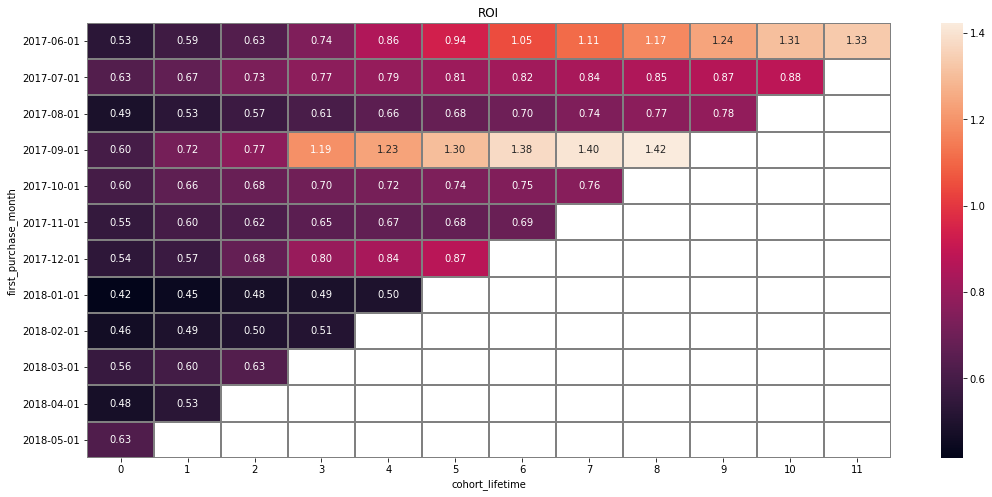

In [91]:
# creating pivot table and making a heatmap
roi_pivot.index = roi_pivot.index.astype(str)
plt.figure(figsize = (18, 8))
sns.heatmap(roi_pivot, annot = True, linewidths = 1, linecolor = 'grey', 
            fmt = '.2f').set(title = 'ROI');

___Conclusions___
1. The best cumulative LTV and ROI after 6 months are in 2017-09 cohort. Something happens in 2017-12 with this cohort. We should investigate the reasons and use in marketing.
2. Source with IDs 3 and 4 have the largest acquisition, that's why we should give them up and use the freed up money in sources 1, 2, 5, 9 and 10.
3. Besides average number of days between registration and placing first order is about 17 days. That's why it's better to remind registered users about the service approximately in the first ten days afrer the registration.
4. Retention rate is very low from the first month of cohorts lifetime. Maybe we should remind registered users about the service in the first month. 
5. Retention rate in purchases is not so low id the first month of cohorts 2017-09 and 2017-10. We should investigate the reasons and use in marketing.